# S13 T02: Base de dades MySQL

Create a database with MySQL.

## Exercise 1

Create a simple relational database using MySQL (https://www.mysql.com/) and connect it to Python

In [1]:
# Importing libraries

import mysql.connector as connection

import pandas as pd

Created a database with MySQL called Shops with the following tables: `customers`, `employees`, `orders`, `ordersproducts`, `products`, `productstypes`, `shops`.

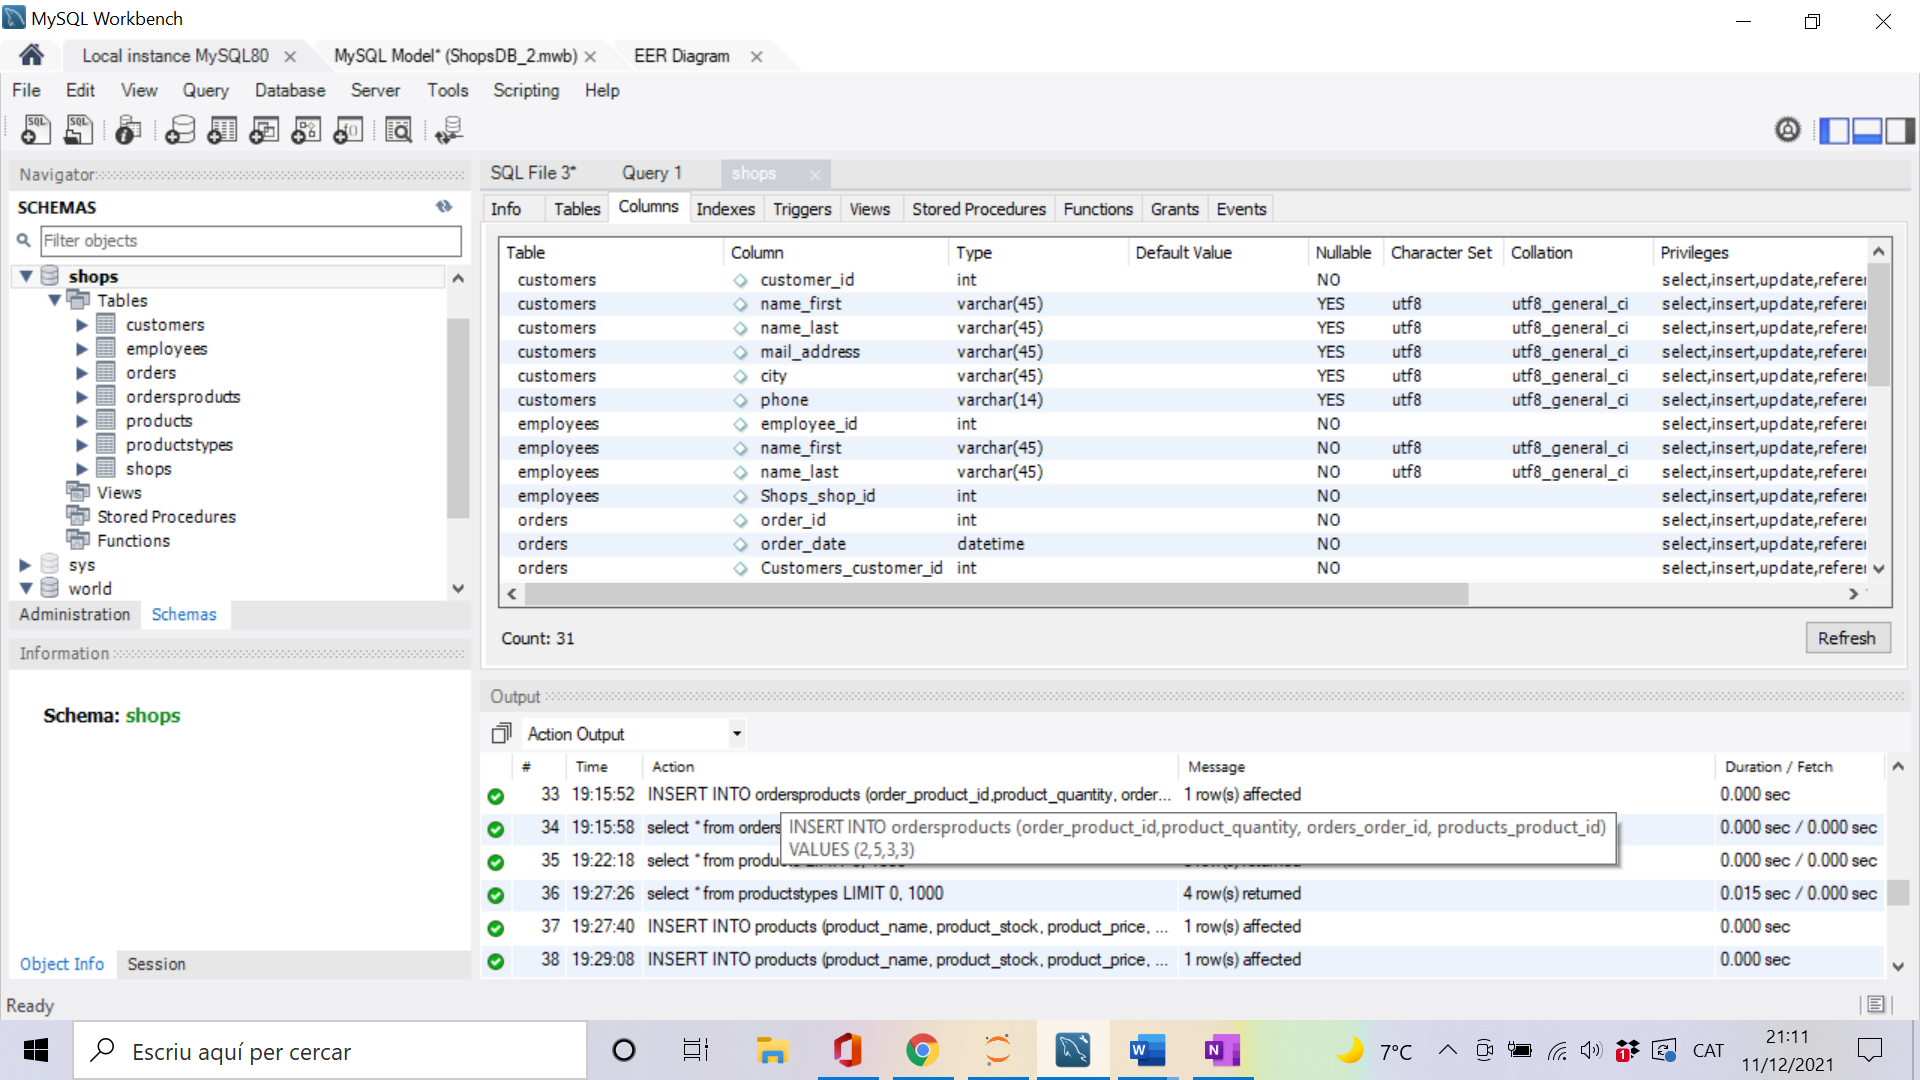

In [2]:
from IPython.display import Image
Image(filename='MySQL Shops.png',width=800, height=400)

In [3]:
# Starting by creating a connection to the database using the username and password from your MySQL database

mydb = connection.connect(
  host="localhost",
  user="root",
  password="Manelbd121210$"
)

print(mydb)

## Exercise 2

Show that you can upload some simple queries to a Pandas Dataframe.

In [4]:
# Starting querying the database using SQL statements.

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM shops.customers")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(1, 'Joseph', 'Smith', 'jsmith@hotmail.com', 'London', '654 345 567')
(2, 'Karl', 'Johanson', 'kjoh@hotmail.com', 'Aberdeen', '670 232 957')
(3, 'Albert', 'Saratosa', 'alb@hotmail.com', 'Barcelona', '785 349 680')
(4, 'Jaume', 'Roman', 'rom@hotmail.com', 'Girona', '690 432 003')
(5, 'Abie', 'Pie', 'pie@hotmail.com', 'Terrassa', '789 789 999')


In [5]:
# Second example

mycursor.execute("SELECT * FROM shops.products")

myresult2 = mycursor.fetchall()

for x in myresult2:
  print(x)

(1, 'TV LED 50', 5, Decimal('320.50'), 'ODL 50760UN-TAB, UHD 4K, 3840x2160, DVB-T2, Android TV, Smart TV, 4x HDMI, 3x USB, Negro3', 2)
(2, 'TV LED 43', 12, Decimal('450.50'), 'LG 43UP77006LB.AEU, UHD 4K, QuadCore, webOS 6.0, Smart TV, Asistentes de voz, AI Sound, Negro', 2)
(3, 'TV LED 32', 7, Decimal('285.50'), 'Xiaomi Mi TV 4A, HD, Quad Core, BT, Android TV, PatchWall, Google Assistant, Chromecast, Negro', 2)
(4, 'Lenovo IdeaPad 3 15ITL6', 7, Decimal('738.00'), '15.6 FHD, Intel® Core™ i7-1165G7, 8 GB RAM, 512 GB SSD, Iris® Xe, FDOS', 1)
(5, 'Lavadora carga frontal', 5, Decimal('493.00'), 'LG F4WV3010S3W, 10.5 kg, 1400rpm, 61 kWh, 14 Programas, LED, 73 dB, Blanco', 3)
(6, 'Lavavajillas', 9, Decimal('455.00'), 'Bosch SMS4HVI31E, Independiente, 13 Servicios, 6 programas, Home connect, 60 cm, Inox', 4)


In [6]:
# Third example using left join

mycursor = mydb.cursor()

sql = "SELECT \
customers.name_last, \
orders.order_date \
FROM shops.customers \
LEFT JOIN shops.orders ON customers.customer_id=orders.Customers_customer_id"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('Smith', datetime.datetime(2021, 4, 1, 0, 0))
('Johanson', datetime.datetime(2021, 4, 8, 0, 0))
('Saratosa', datetime.datetime(2021, 4, 12, 0, 0))
('Roman', None)
('Pie', None)


In [7]:
# Creating a dataframe

try:
    mydb = connection.connect(host="localhost", database = 'Shops',user="root", passwd="Manelbd121210$",use_pure=True)
    query = "Select * from customers;"
    result_dataFrame = pd.read_sql(query,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

In [8]:
result_dataFrame

,customer_id,name_first,name_last,mail_address,city,phone
0,1,Joseph,Smith,jsmith@hotmail.com,London,654 345 567
1,2,Karl,Johanson,kjoh@hotmail.com,Aberdeen,670 232 957
2,3,Albert,Saratosa,alb@hotmail.com,Barcelona,785 349 680
3,4,Jaume,Roman,rom@hotmail.com,Girona,690 432 003
4,5,Abie,Pie,pie@hotmail.com,Terrassa,789 789 999


## Exercise 3




Generate a graph that summarizes the data.

In [9]:
result_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   5 non-null      int64 
 1   name_first    5 non-null      object
 2   name_last     5 non-null      object
 3   mail_address  5 non-null      object
 4   city          5 non-null      object
 5   phone         5 non-null      object
dtypes: int64(1), object(5)
memory usage: 368.0+ bytes


In [10]:
result_dataFrame.describe(include='all')

,customer_id,name_first,name_last,mail_address,city,phone
count,5.000000,5,5,5,5,5
unique,NaN,5,5,5,5,5
top,NaN,Joseph,Smith,jsmith@hotmail.com,London,654 345 567
freq,NaN,1,1,1,1,1
mean,3.000000,NaN,NaN,NaN,NaN,NaN
std,1.581139,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,2.000000,NaN,NaN,NaN,NaN,NaN
50%,3.000000,NaN,NaN,NaN,NaN,NaN
75%,4.000000,NaN,NaN,NaN,NaN,NaN
